#Hypothesis 5:
The population density is directly proportional the average response time taken by an emergency unit to respond to that 
incident. 
(E.g. Are the instances of the vehicle taking more time to reach the emergency spot in densely populated neighborhoods?)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
my_dir = 'C:/Users/megha/OneDrive - University of Illinois - Urbana/PR Final Project/Datasets/' #https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb
NYPD_Arrests = my_dir + 'NYPD_Arrests_Data__Historic_.csv' # Loading NYPD Arrest Data file
Complaints = my_dir +  'NYPD_Complaint_Data_Historic.csv' # Loading NYPD Complaints Data file
EMS_incident = my_dir +  'EMS_Incident_Dispatch_Data.csv' # Loading EMS incident dispatch Data file
NYC_Population = my_dir +  'New_York_City_Population.csv' # Loading NYC Population Data file

In [5]:
def get_file(csv_files):
    
    """Given a filename which has a comma separated (.csv) filetype,return a pandas  
    dataframe of crime data containing the three relevant columns needed for analysis.
    
    We load the file as a pandas dataframe having no headers and load only 3 relevant column 
    needed for analysis called (CMPLNT_NUM,CMPLNT_FR_DT and BORO_NM)
    
    :param csv_files: The csv file to load
    :return: a pandas dataframe of crime data containing the three relevant columns needed for analysis
    """
    data_file = pd.read_csv(csv_files,usecols=['CAD_INCIDENT_ID','DISPATCH_RESPONSE_SECONDS_QY','INCIDENT_RESPONSE_SECONDS_QY','INCIDENT_TRAVEL_TM_SECONDS_QY','BOROUGH']) # Import only necessary columns from the dataset
    return data_file


In [14]:
NYC_Complaint_Data = pd.read_csv(Complaints,usecols=['CMPLNT_NUM','CMPLNT_FR_DT','BORO_NM']) # Import only necessary columns from the dataset

In [15]:
area_count = NYC_Complaint_Data.groupby(['BORO_NM']).count()
area_count = area_count.reset_index()
area_count

,BORO_NM,CMPLNT_NUM,CMPLNT_FR_DT
0,BRONX,1484373,1484265
1,BROOKLYN,2035004,2034792
2,MANHATTAN,1645015,1644873
3,QUEENS,1351400,1351230
4,STATEN ISLAND,321394,321372


In [16]:
area_population = pd.read_csv(NYC_Population)
area_population = area_population[area_population['Year'] > 2000]
area_population

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538
...,...,...,...,...,...,...
385,Staten Island,2010,85,SI37,Stapleton-Rosebank,26453
386,Staten Island,2010,85,SI45,New Dorp-Midland Beach,21896
387,Staten Island,2010,85,SI48,Arden Heights,25238
388,Staten Island,2010,85,SI54,Great Kills,40720


In [17]:
area_population_sum = area_population.groupby(['Borough'])['Population'].sum()
area_population_sum
borough_pop_df = area_population_sum.to_frame().reset_index()
borough_pop_df

,Borough,Population
0,Bronx,1385108
1,Brooklyn,2504700
2,Manhattan,1585873
3,Queens,2230722
4,Staten Island,468730


In [18]:
#https://en.wikipedia.org/wiki/Demographics_of_New_York_City
borough_pop_df['Area in sq. km'] = [109.04, 183.42, 59.13, 281.09, 151.18]
borough_pop_df['Population Density'] = borough_pop_df['Population']/borough_pop_df['Area in sq. km']
borough_pop_df['Borough'] = borough_pop_df['Borough'].str.upper() 
borough_pop_df = borough_pop_df.rename(columns={"Borough": "BORO_NM"})
borough_pop_df

,BORO_NM,Population,Area in sq. km,Population Density
0,BRONX,1385108,109.04,12702.751284
1,BROOKLYN,2504700,183.42,13655.544652
2,MANHATTAN,1585873,59.13,26820.108236
3,QUEENS,2230722,281.09,7935.970686
4,STATEN ISLAND,468730,151.18,3100.476253


In [19]:
result_df = pd.merge(area_count[['BORO_NM','CMPLNT_NUM']], borough_pop_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density
0,BRONX,1484373,1385108,109.04,12702.751284
1,BROOKLYN,2035004,2504700,183.42,13655.544652
2,MANHATTAN,1645015,1585873,59.13,26820.108236
3,QUEENS,1351400,2230722,281.09,7935.970686
4,STATEN ISLAND,321394,468730,151.18,3100.476253


In [20]:
result_df['crime per capita'] = result_df['CMPLNT_NUM']/result_df['Population']
result_df['Population Density'] = result_df['Population Density'].astype('int64')
result_df = result_df.sort_values(by = 'Population Density',ascending = False)
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita
2,MANHATTAN,1645015,1585873,59.13,26820,1.037293
1,BROOKLYN,2035004,2504700,183.42,13655,0.812474
0,BRONX,1484373,1385108,109.04,12702,1.071666
3,QUEENS,1351400,2230722,281.09,7935,0.605813
4,STATEN ISLAND,321394,468730,151.18,3100,0.685670


In [23]:
EMS_Data = get_file(EMS_incident)
EMS_Data

,CAD_INCIDENT_ID,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,BOROUGH
0,80010001,0,NaN,NaN,BROOKLYN
1,80010002,0,NaN,NaN,BROOKLYN
2,80010003,732,1657.0,925.0,QUEENS
3,80010004,0,NaN,NaN,BROOKLYN
4,80010005,0,NaN,NaN,BROOKLYN
...,...,...,...,...,...
16401658,193654646,4,259.0,255.0,RICHMOND / STATEN ISLAND
16401659,193654647,605,1189.0,584.0,RICHMOND / STATEN ISLAND
16401660,193654648,10,248.0,238.0,QUEENS
16401661,193654651,98,318.0,220.0,QUEENS


sum(pd.isnull(EMS_Data['DISPATCH_RESPONSE_SECONDS_QY'])) = 0
sum(pd.isnull(EMS_Data['INCIDENT_RESPONSE_SECONDS_QY'])) = 534209
sum(pd.isnull(EMS_Data['INCIDENT_TRAVEL_TM_SECONDS_QY'])) = 531500

In [32]:
EMS_count_cases = EMS_Data[['CAD_INCIDENT_ID','BOROUGH']]
EMS_count_cases = EMS_count_cases.groupby(['BOROUGH']).sum()

,BOROUGH,CAD_INCIDENT_ID
0,BRONX,3790978
1,BROOKLYN,4706322
2,MANHATTAN,4065279
3,QUEENS,3160376
4,RICHMOND / STATEN ISLAND,678554
5,UNKNOWN,154


In [34]:
EMS_dispatch_response_sum = EMS_Data[['DISPATCH_RESPONSE_SECONDS_QY','BOROUGH']]
EMS_dispatch_response_sum = EMS_dispatch_response_sum.groupby(['BOROUGH']).sum()
#

In [35]:
EMS_dispatch_response_sum.reset_index()

,BOROUGH,DISPATCH_RESPONSE_SECONDS_QY
0,BRONX,430698291
1,BROOKLYN,326299931
2,MANHATTAN,482017232
3,QUEENS,167783063
4,RICHMOND / STATEN ISLAND,28285989
5,UNKNOWN,238025


In [45]:
EMS_incident_response_sum = EMS_Data[['INCIDENT_RESPONSE_SECONDS_QY','BOROUGH']]
EMS_incident_response_sum = EMS_incident_response_sum.groupby(['BOROUGH']).sum()
EMS_incident_response_sum['INCIDENT_RESPONSE_SECONDS_QY']=EMS_incident_response_sum['INCIDENT_RESPONSE_SECONDS_QY'].astype('int64')
EMS_incident_response_sum.reset_index()

,BOROUGH,INCIDENT_RESPONSE_SECONDS_QY
0,BRONX,2177196245
1,BROOKLYN,2441988520
2,MANHATTAN,2274192740
3,QUEENS,1539849607
4,RICHMOND / STATEN ISLAND,298529557
5,UNKNOWN,312697


In [55]:
#Renaming the index to Staten Island 

EMS_incident_response_sum.index
EMS_incident_response_sum = EMS_incident_response_sum.rename(index={'RICHMOND / STATEN ISLAND': 'STATEN ISLAND'})  #https://note.nkmk.me/en/python-pandas-dataframe-rename/
EMS_incident_response_sum


,INCIDENT_RESPONSE_SECONDS_QY
BOROUGH,
BRONX,2177196245
BROOKLYN,2441988520
MANHATTAN,2274192740
QUEENS,1539849607
STATEN ISLAND,298529557
UNKNOWN,312697


In [56]:
result_inc_resp_df = pd.merge(result_df, EMS_incident_response_sum, how='inner', left_on='BORO_NM', right_on='BOROUGH')


In [57]:
result_inc_resp_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita,INCIDENT_RESPONSE_SECONDS_QY
0,MANHATTAN,1645015,1585873,59.13,26820,1.037293,2274192740
1,BROOKLYN,2035004,2504700,183.42,13655,0.812474,2441988520
2,BRONX,1484373,1385108,109.04,12702,1.071666,2177196245
3,QUEENS,1351400,2230722,281.09,7935,0.605813,1539849607
4,STATEN ISLAND,321394,468730,151.18,3100,0.685670,298529557


In [58]:
#calculating the correlation between Population Density and the crime per capita
#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr
correlation = result_inc_resp_df['INCIDENT_RESPONSE_SECONDS_QY'].corr(result_df['Population Density'])
print('The correlation coefficient between Population Density and the Incident response time is : ',correlation)

The correlation coefficient between Population Density and the Incident response time is :  0.693648118036544


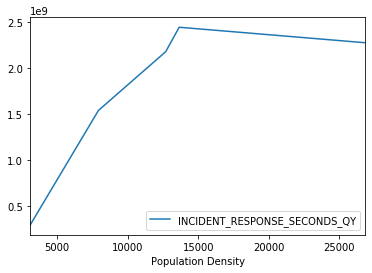

In [60]:
#https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
ax = plt.gca() 
result_inc_resp_df.plot(kind='line',x='Population Density',y='INCIDENT_RESPONSE_SECONDS_QY',ax=ax)
#result_df.plot(kind='line',x='BORO_NM',y='crime per capita', color='red', ax=ax)
plt.show()